# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech


- Nama: Muh. Iqbal Hardiyanto
- Email: muhiqbal1059@gmail.com
- Id Dicoding: miqbal_h


## Persiapan


### Menyiapkan library yang dibutuhkan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan


## Data Understanding


In [2]:
df_emp = pd.read_csv('/content/employee_data.csv')
print("Data Overview:")
df_emp.head()

Data Overview:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [3]:
print("Data Shape:", df_emp.shape)

Data Shape: (1470, 35)


In [4]:
print("\nData Types:")
df_emp.dtypes


Data Types:


,0
EmployeeId,int64
Age,int64
Attrition,float64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64


In [5]:
print("\nData Info:")
df_emp.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 

In [6]:
print("\nMissing Values Before Handling:")
print(df_emp.isnull().sum())


Missing Values Before Handling:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLif

In [7]:
print("\nAnalisis Deskriptif:\n")
print(df_emp.describe(include='all'))


Analisis Deskriptif:

         EmployeeId          Age    Attrition BusinessTravel    DailyRate  \
count   1470.000000  1470.000000  1058.000000           1470  1470.000000   
unique          NaN          NaN          NaN              3          NaN   
top             NaN          NaN          NaN  Travel_Rarely          NaN   
freq            NaN          NaN          NaN           1043          NaN   
mean     735.500000    36.923810     0.169187            NaN   802.485714   
std      424.496761     9.135373     0.375094            NaN   403.509100   
min        1.000000    18.000000     0.000000            NaN   102.000000   
25%      368.250000    30.000000     0.000000            NaN   465.000000   
50%      735.500000    36.000000     0.000000            NaN   802.000000   
75%     1102.750000    43.000000     0.000000            NaN  1157.000000   
max     1470.000000    60.000000     1.000000            NaN  1499.000000   

                    Department  DistanceFromHome    

### Exploratory Data Analysis (EDA)

In [8]:
print(df_emp['Attrition'].unique())

[nan  1.  0.]


In [9]:
print("\nAttrition Value Counts:")
print(df_emp['Attrition'].value_counts(dropna=False))


Attrition Value Counts:
Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64


In [10]:
print("\nAttrition Ratio:")
print(df_emp['Attrition'].value_counts(normalize=True))


Attrition Ratio:
Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


In [11]:
# Hitung jumlah attrition berdasarkan job satisfaction
df_attrition_jobs = df_emp.groupby('JobSatisfaction')['Attrition'].value_counts().unstack()
df_attrition_jobs

Attrition,0.0,1.0
JobSatisfaction,,
1,159,46
2,163,32
3,256,62
4,301,39


In [12]:
# Menampilkan nama masing-masing pekerjaan dari setiap departemen

# Mengelompokkan data berdasarkan departemen dan pekerjaan, kemudian menjumlahkannya
job_names = df_emp.groupby(['Department', 'JobRole'])['EmployeeId'].count().reset_index()
job_names = job_names.rename(columns={'EmployeeId': 'jumlah_karyawan'})

# Menampilkan hasil
job_names

,Department,JobRole,jumlah_karyawan
0,Human Resources,Human Resources,52
1,Human Resources,Manager,11
2,Research & Development,Healthcare Representative,131
3,Research & Development,Laboratory Technician,259
4,Research & Development,Manager,54
5,Research & Development,Manufacturing Director,145
6,Research & Development,Research Director,80
7,Research & Development,Research Scientist,292
8,Sales,Manager,37
9,Sales,Sales Executive,326


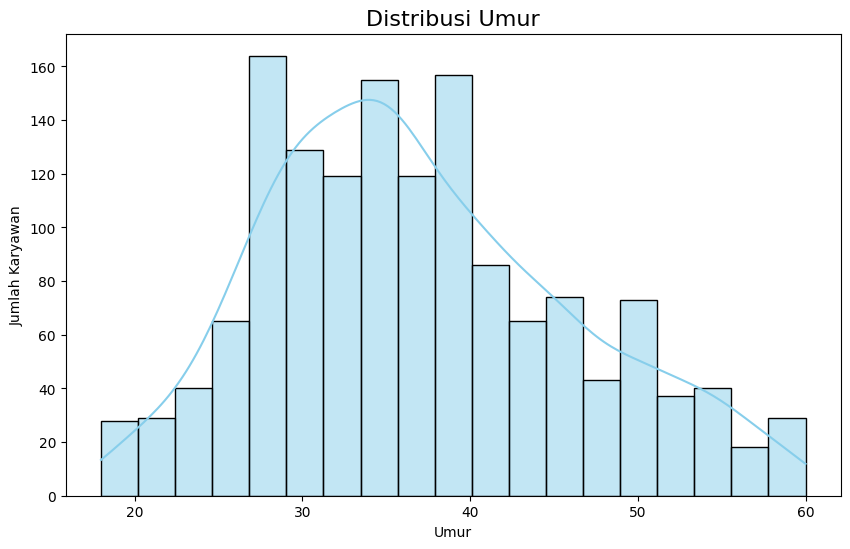

In [13]:
# Distribution analysis
plt.figure(figsize=(10, 6))
sns.histplot(df_emp['Age'], kde=True, color='skyblue')
plt.title('Distribusi Umur', fontsize=16)
plt.xlabel('Umur')
plt.ylabel('Jumlah Karyawan')
plt.show()

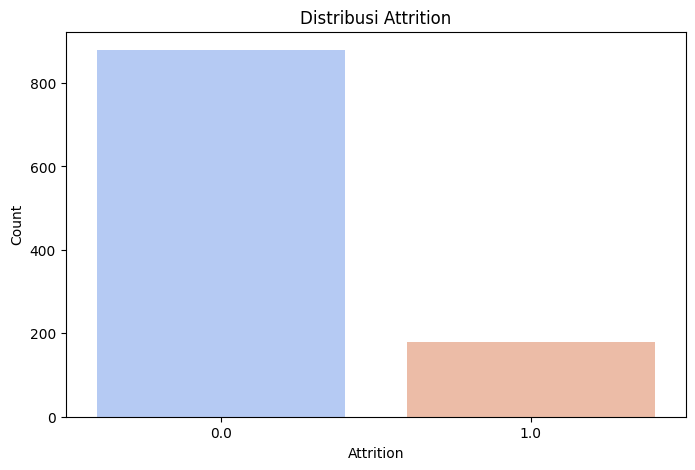

In [14]:
# Distribusi Attrition
attrition_counts = df_emp['Attrition'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    hue=attrition_counts.index, # Ini akan membuat warna berbeda untuk 'Yes' dan 'No'
    palette='coolwarm',
    legend=False
)
plt.title('Distribusi Attrition', fontsize=12)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

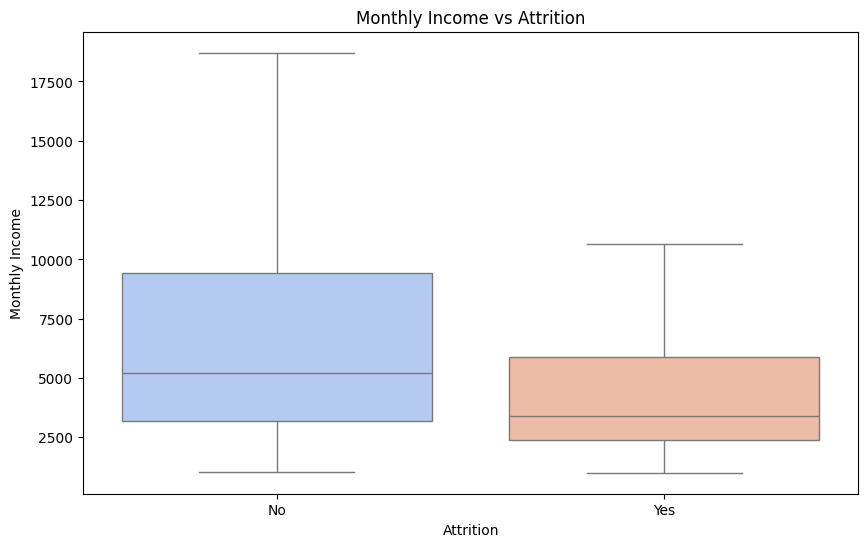

In [15]:
# Income vs Attrition
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Attrition',
    y='MonthlyIncome',
    data=df_emp,
    hue='Attrition',
    palette='coolwarm',
    showfliers=False,
    legend=False
)
plt.title('Monthly Income vs Attrition', fontsize=12)
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

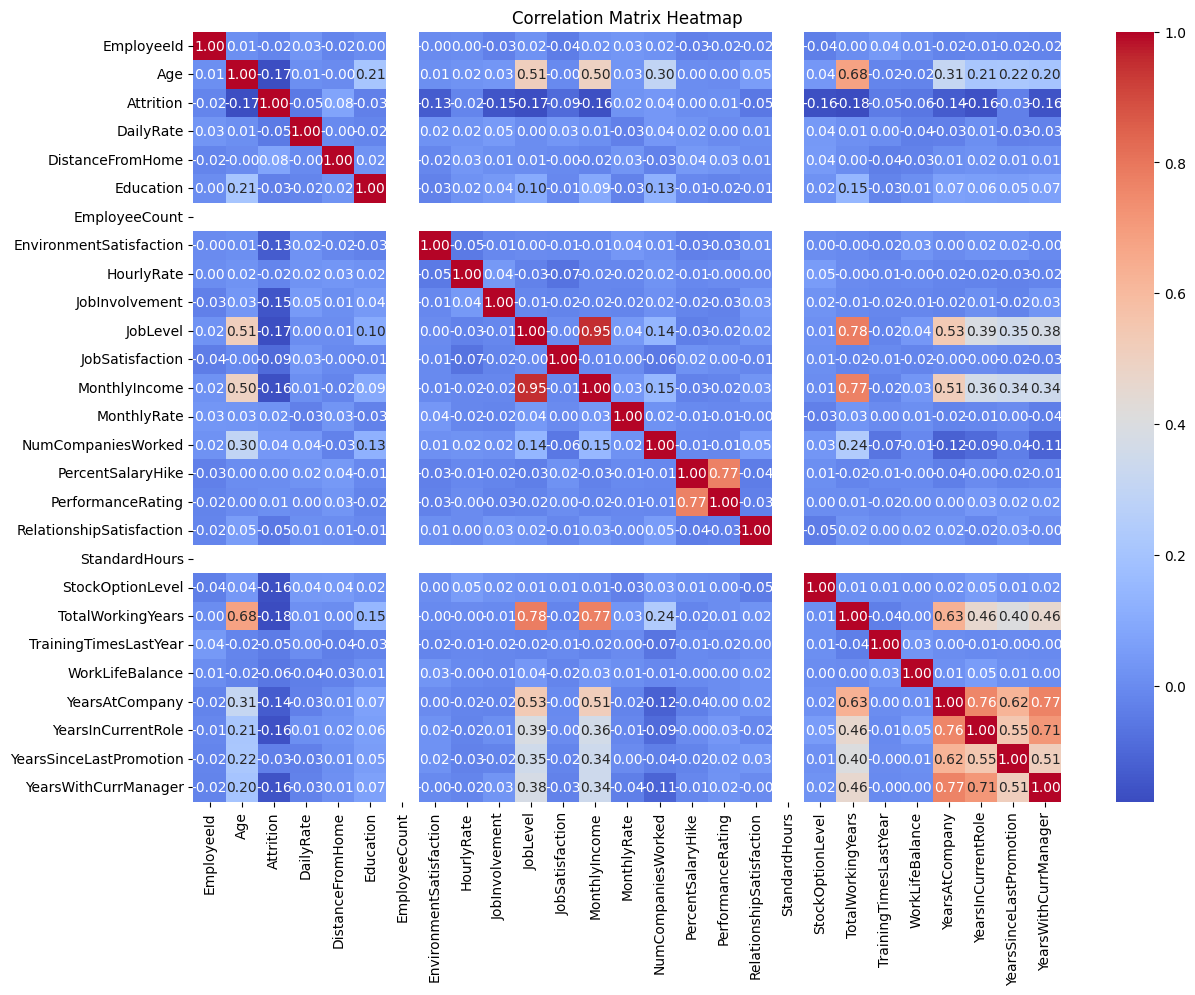

In [16]:
# Correlation matrix
plt.figure(figsize=(14, 10))
numerical_df = df_emp.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

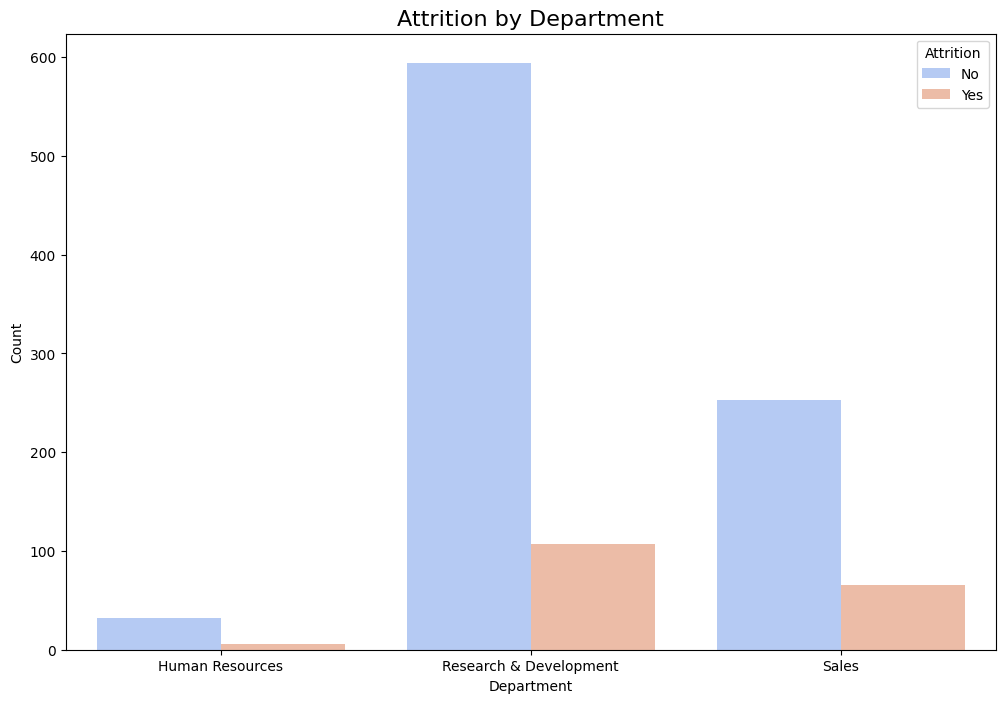

In [17]:
# Department-wise attrition
plt.figure(figsize=(12,8))
sns.countplot(x='Department', hue='Attrition', data=df_emp, palette='coolwarm')
plt.title('Attrition by Department', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

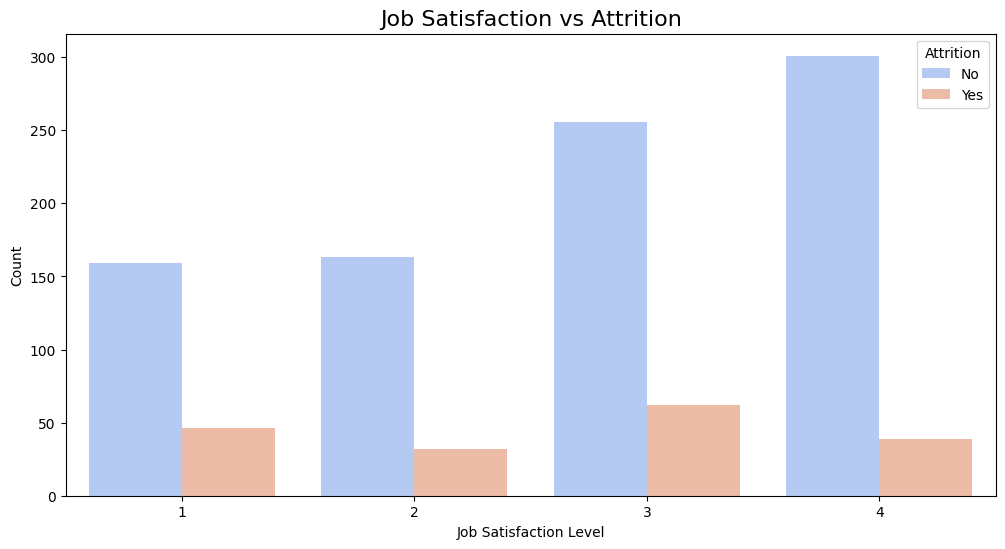

In [18]:
# Job Satisfaction vs Attrition
plt.figure(figsize=(12,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_emp, palette='coolwarm')
plt.title('Job Satisfaction vs Attrition', fontsize=16)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## Data Preparation / Preprocessing


In [19]:
attrition_mapping = {
    'Yes': 1, 'yes': 1, 'YES': 1, '1': 1, 1.0: 1, '1.0': 1,
    'No': 0, 'no': 0, 'NO': 0, '0': 0, 0.0: 0, '0.0': 0
}
# Konversi target 'Attrition' ke Biner
df_emp['Attrition'] = df_emp['Attrition'].map(attrition_mapping)

In [20]:
# Handling missing values
df_emp = df_emp.dropna(subset = ['Attrition'])

df_emp['Attrition'] = df_emp['Attrition'].astype(int)

In [21]:
# Cek hasil
print("\nMissing Values After Cleaning:")
print(df_emp.isnull().sum())
print("\nAttrition Distribution After Cleaning:")
print(df_emp['Attrition'].value_counts(normalize=True))


Missing Values After Cleaning:
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

### Feature Selection and Data Splitting

In [22]:
# Buat salinan data untuk diproses
data_emp_processed = df_emp.copy()

In [23]:
# Definisikan fitur yang akan digunakan (X) dan target (y)
features_to_use = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

### SMOTE dan Scalling

In [24]:
X = data_emp_processed[features_to_use]
y = data_emp_processed['Attrition']

# Split data sebelum preprocessing untuk menghindari data leakage
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )


print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (846, 29)
Shape of X_test: (212, 29)
Shape of y_train: (846,)
Shape of y_test: (212,)


### Pipeline Preprocessing

In [25]:
# Identifikasi kolom numerik dan kategorikal
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical features: {numeric_features}")
print(f"Categorical features: {categorical_features}")


Numerical features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [26]:
# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabungkan transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Preprocessing data training dan testing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nShape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")


Shape of X_train_processed: (846, 50)
Shape of X_test_processed: (212, 50)


### Handling Class Imbalance with SMOTE

In [27]:
# Menerapkan SMOTE hanya pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print(f"\nShape of X_train_resampled after SMOTE: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled after SMOTE: {y_train_resampled.shape}")

# Cek distribusi kelas setelah SMOTE
print("\nClass distribution in y_train_resampled after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Shape of X_train_resampled after SMOTE: (1406, 50)
Shape of y_train_resampled after SMOTE: (1406,)

Class distribution in y_train_resampled after SMOTE:
Attrition
0    703
1    703
Name: count, dtype: int64


## Modeling


In [28]:
# Menerapkan pengklasifikasi model klasifikasi

# Definisikan model dan parameter grid untuk SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Menerapkan pengklasifikasi
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(
        n_estimators=800,
        max_depth=49,
        min_samples_split=3,
        min_samples_leaf=1,
        random_state=42,
    ),
    'SVM': GridSearchCV(
        SVC(probability=True, random_state=42),
        param_grid=svm_param_grid,
        cv=3,
        scoring='f1',
        n_jobs=-1
    )
}

In [29]:
# Latih dan evaluasi model
model_results = {}

for name, model in classifiers.items():
    print(f"\nTraining {name}...")

    # Latih model
    if name == 'SVM':
        model.fit(X_train_resampled, y_train_resampled)
        best_model = model.best_estimator_
        print(f"Best parameters for SVM: {model.best_params_}")
    else:
        model.fit(X_train_resampled, y_train_resampled)
        best_model = model

    # Prediksi pada data test
    y_pred_test = best_model.predict(X_test_processed)
    y_pred_proba_test = best_model.predict_proba(X_test_processed)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Evaluasi model
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    report_dict_test = classification_report(y_test, y_pred_test, output_dict=True)
    report_str_test = classification_report(y_test, y_pred_test)

    model_results[name] = {
        'model': best_model,
        'accuracy': accuracy_test,
        'precision': precision_test,
        'recall': recall_test,
        'f1_score': f1_test,
        'report_dict': report_dict_test,
        'report_str': report_str_test,
        'y_pred': y_pred_test,
        'y_pred_proba': y_pred_proba_test
    }

    # Print hasil evaluasi
    print(f"{name} Test Accuracy: {accuracy_test:.4f}")
    print(f"{name} Test F1 Score: {f1_test:.4f}")
    print("="*50)
    print(f"{name} Test Classification Report:\n{report_str_test}\n")


Training LogisticRegression...
LogisticRegression Test Accuracy: 0.7170
LogisticRegression Test F1 Score: 0.4444
LogisticRegression Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       176
           1       0.33      0.67      0.44        36

    accuracy                           0.72       212
   macro avg       0.62      0.70      0.63       212
weighted avg       0.82      0.72      0.75       212



Training RandomForest...
RandomForest Test Accuracy: 0.8396
RandomForest Test F1 Score: 0.3929
RandomForest Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       176
           1       0.55      0.31      0.39        36

    accuracy                           0.84       212
   macro avg       0.71      0.63      0.65       212
weighted avg       0.82      0.84      0.82       212



Training SVM...
Best parameters for SVM: {'C'

## Evaluation


### Logistic Regression

In [30]:
accuracy_lr = model_results['LogisticRegression']['accuracy']
f1_score_lr = model_results['LogisticRegression']['f1_score']

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression F1 Score: {f1_score_lr:.4f}")
print(f"Logistic Regression Classification Report:\n{model_results['LogisticRegression']['report_str']}")

Logistic Regression Accuracy: 0.7170
Logistic Regression F1 Score: 0.4444
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       176
           1       0.33      0.67      0.44        36

    accuracy                           0.72       212
   macro avg       0.62      0.70      0.63       212
weighted avg       0.82      0.72      0.75       212



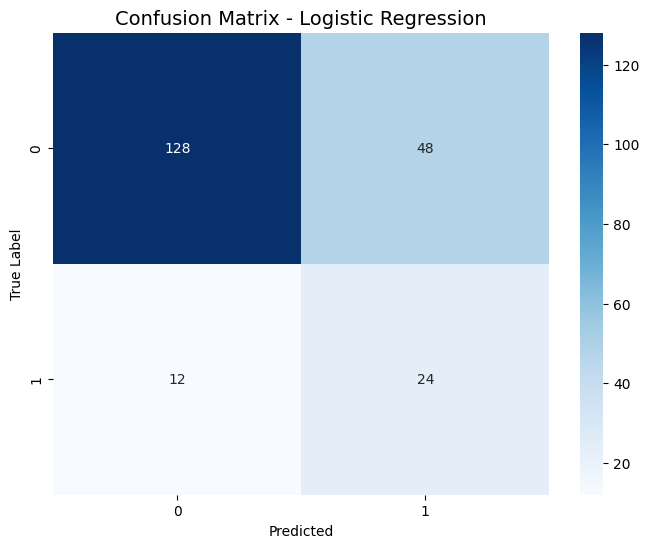

In [31]:
# Visualisasi Confussion Matrix
y_pred_lr = model_results['LogisticRegression']['y_pred']
cfmx_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cfmx_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

### Random Forest

In [32]:
accuracy_rf = model_results['RandomForest']['accuracy']
f1_score_rf = model_results['RandomForest']['f1_score']

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score: {f1_score_rf:.4f}")
print(f"Random Forest Classification Report:\n{model_results['RandomForest']['report_str']}")

Random Forest Accuracy: 0.8396
Random Forest F1 Score: 0.3929
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       176
           1       0.55      0.31      0.39        36

    accuracy                           0.84       212
   macro avg       0.71      0.63      0.65       212
weighted avg       0.82      0.84      0.82       212



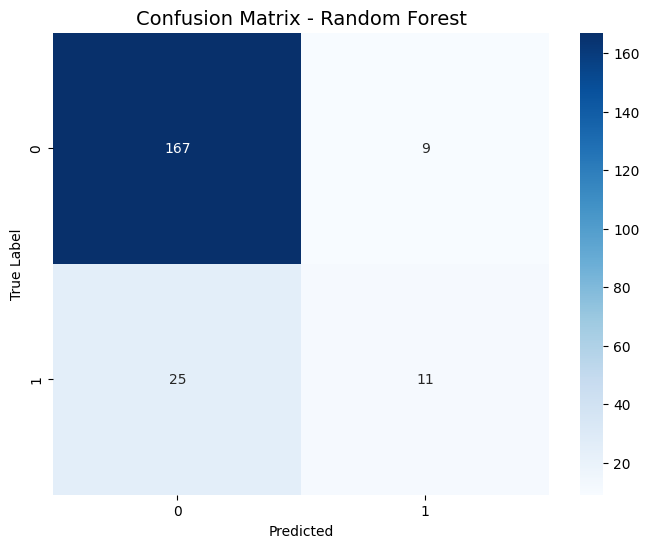

In [33]:
# Visualisasi Confusion Matrix
y_pred_rf = model_results['RandomForest']['y_pred']
cfmx_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cfmx_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

### SVM

In [34]:
accuracy_svm = model_results['SVM']['accuracy']
f1_score_svm = model_results['SVM']['f1_score']

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM F1 Score: {f1_score_svm:.4f}")
print(f"SVM Classification Report:\n{model_results['SVM']['report_str']}")

SVM Accuracy: 0.8538
SVM F1 Score: 0.4151
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       176
           1       0.65      0.31      0.42        36

    accuracy                           0.85       212
   macro avg       0.76      0.64      0.67       212
weighted avg       0.83      0.85      0.83       212



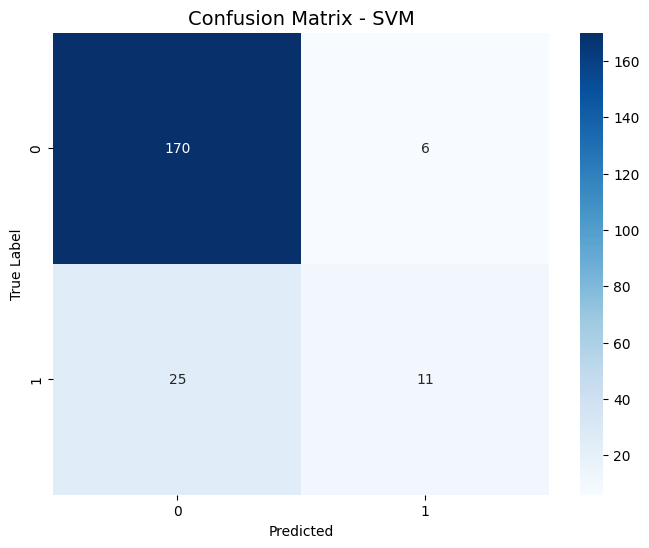

In [35]:
# Visualisasi Confusion Matrix
y_pred_svm = model_results['SVM']['y_pred']
cfmx_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cfmx_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

### Evaluasi Model terbaik

In [36]:
best_model_name = None
best_f1_score = 0

for name, result in model_results.items():
    if result['f1_score'] > best_f1_score:
        best_f1_score = result['f1_score']
        best_model_name = name


print(f"\nModel terbaik: {best_model_name} dengan F1-score: {best_f1_score:.4f}")


Model terbaik: LogisticRegression dengan F1-score: 0.4444


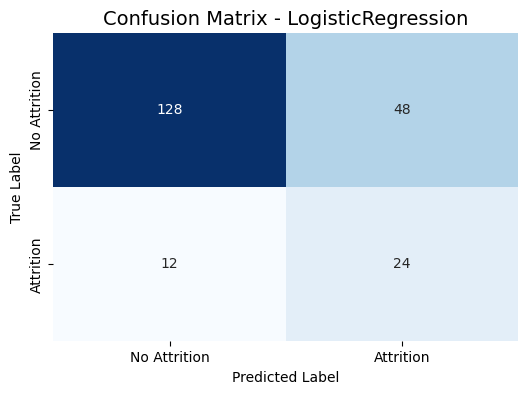

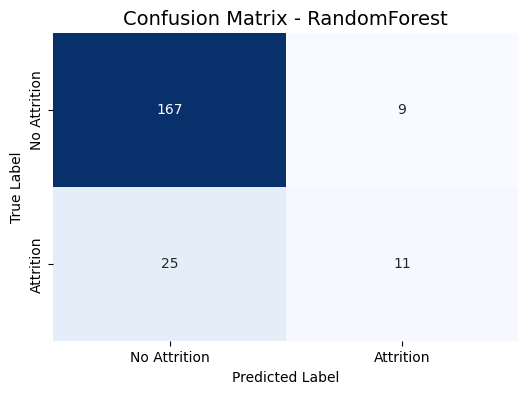

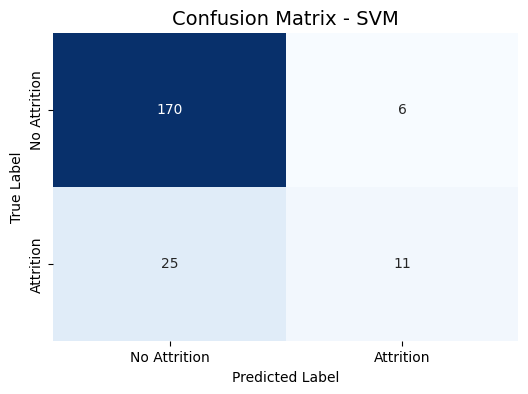

In [37]:
# Visualisasi Confusion Matrix untuk semua model
for name, result in model_results.items():
    plt.figure(figsize=(6,4))
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'Confusion Matrix - {name}', fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Coefficients for Logistic Regression:


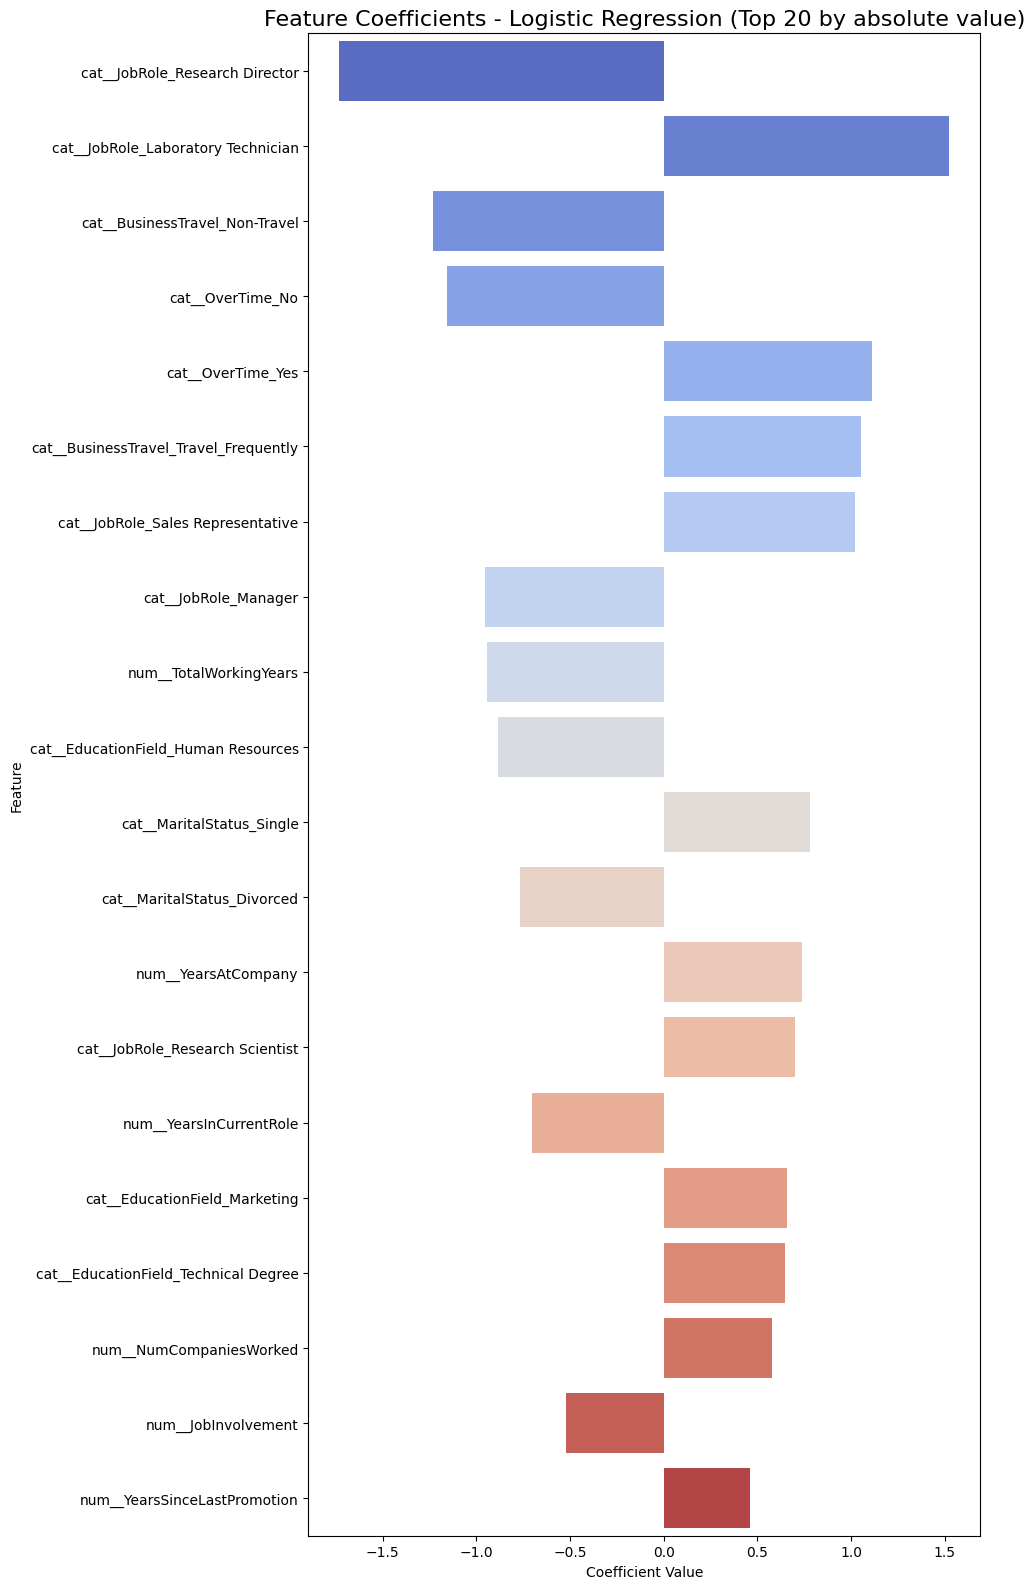


Top 10 Coefficients (by absolute value):
                                  Feature  Coefficient
41         cat__JobRole_Research Director    -1.734412
38     cat__JobRole_Laboratory Technician     1.525107
22         cat__BusinessTravel_Non-Travel    -1.233705
48                       cat__OverTime_No    -1.158289
49                      cat__OverTime_Yes     1.109166
23  cat__BusinessTravel_Travel_Frequently     1.052736
44      cat__JobRole_Sales Representative     1.020939
39                   cat__JobRole_Manager    -0.955482
15                 num__TotalWorkingYears    -0.942284
28    cat__EducationField_Human Resources    -0.886533


In [38]:
# Feature Importance untuk model Random Forest
if best_model_name == 'RandomForest':
    print("\nFeature Importance for Random Forest:")
    try:
        feature_names = preprocessor.get_feature_names_out()
        importances = model_results['RandomForest']['model'].feature_importances_

        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, max(6, len(feature_importance_df) // 3)))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
        plt.title('Feature Importance - Random Forest (Top 20)', fontsize=16)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        print("\nTop 10 Features:")
        print(feature_importance_df.head(10))

    except Exception as e:
        print(f"Error retrieving feature importances: {e}")

# Koefisien untuk Logistic Regression
if best_model_name == 'LogisticRegression':
    print("\nCoefficients for Logistic Regression:")
    try:
        feature_names = preprocessor.get_feature_names_out()
        coefficients = model_results['LogisticRegression']['model'].coef_[0]

        coeff_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coefficients
        }).sort_values(by='Coefficient', key=abs, ascending=False)

        plt.figure(figsize=(10, max(6, len(coeff_df) // 3)))
        sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(20), palette='coolwarm')
        plt.title('Feature Coefficients - Logistic Regression (Top 20 by absolute value)', fontsize=16)
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        print("\nTop 10 Coefficients (by absolute value):")
        print(coeff_df.head(10))

    except Exception as e:
        print(f"Error retrieving coefficients: {e}")

## Save Models

In [39]:
# Simpan semua model dan preprocessor dalam kedua format
for model_name in model_results:
    model = model_results[model_name]['model']

    # Simpan dalam format .pkl
    pkl_filename = f'{model_name}_model.pkl'
    joblib.dump(model, pkl_filename)

    # Simpan dalam format .joblib
    joblib_filename = f'{model_name}_model.joblib'
    joblib.dump(model, joblib_filename)

    print(f"Model '{model_name}' saved as {pkl_filename} and {joblib_filename}")

# Simpan preprocessor dalam kedua format
preprocessor_pkl = 'preprocessor.pkl'
preprocessor_joblib = 'preprocessor.joblib'

joblib.dump(preprocessor, preprocessor_pkl)
joblib.dump(preprocessor, preprocessor_joblib)

print(f"\nPreprocessor saved as {preprocessor_pkl} and {preprocessor_joblib}")

Model 'LogisticRegression' saved as LogisticRegression_model.pkl and LogisticRegression_model.joblib
Model 'RandomForest' saved as RandomForest_model.pkl and RandomForest_model.joblib
Model 'SVM' saved as SVM_model.pkl and SVM_model.joblib

Preprocessor saved as preprocessor.pkl and preprocessor.joblib


### Eksekusi Model dan Simpan Hasil Prediksi

In [40]:
# Fungsi untuk menjalankan prediksi dan menyimpan hasil
def predict_and_save_results(model_name, X_test, y_test, preprocessor, filename):
    model = joblib.load(f'{model_name}_model.pkl')
    X_test_processed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    results_df = X_test.copy()
    results_df['Attrition_Actual'] = y_test.values
    results_df['Attrition_Predicted'] = y_pred
    results_df['Attrition_Probability'] = y_pred_proba

    # Simpan ke CSV
    results_df.to_csv(filename, index=False)
    print(f"Hasil prediksi disimpan sebagai {filename}")

    return results_df


for model_name in model_results.keys():
    filename = f'prediction_results_{model_name}.csv'
    results_df = predict_and_save_results(
        model_name,
        X_test,
        y_test,
        preprocessor,
        filename
    )

    # Tampilkan preview hasil
    print(f"\nPreview hasil untuk {model_name}:")
    print(results_df[['Attrition_Actual', 'Attrition_Predicted', 'Attrition_Probability']].head())

Hasil prediksi disimpan sebagai prediction_results_LogisticRegression.csv

Preview hasil untuk LogisticRegression:
      Attrition_Actual  Attrition_Predicted  Attrition_Probability
958                  0                    1               0.863773
824                  0                    0               0.322993
1180                 1                    0               0.248666
613                  0                    0               0.227622
761                  0                    0               0.062904
Hasil prediksi disimpan sebagai prediction_results_RandomForest.csv

Preview hasil untuk RandomForest:
      Attrition_Actual  Attrition_Predicted  Attrition_Probability
958                  0                    0               0.239491
824                  0                    0               0.216667
1180                 1                    0               0.322083
613                  0                    0               0.118750
761                  0                    0  